In [169]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import re

#### Import the data and get a high-level picture

In [170]:
df = pd.read_csv('sales(1).csv')
df.head()

,order_id,name,ordered_at,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,3,$10.50
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,$3.50,1,$3.50
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,$2.50,2,$5.00
3,10001,NaN,2018-01-01 12:14:54,$1.50,1,$1.50
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,$3.50,1,$3.50


In [171]:
df.shape

(29922, 6)

In [172]:
df.dtypes

order_id       int64
name          object
ordered_at    object
price         object
quantity       int64
line_total    object
dtype: object

#### TODO: Fix column datatypes

Change ordered_at to datetime

Change price and line_total to float

In [173]:
df = df.rename(columns={'ordered_at': 'datetime'})

In [174]:
df[df.columns[3:]] = df[df.columns[3:]].replace('[\$,]', '', regex=True).astype(float)
df[df.columns[4]] = df[df.columns[4]].replace('[\$,]', '', regex=True).astype(int)

In [175]:
df.dtypes

order_id        int64
name           object
datetime       object
price         float64
quantity        int32
line_total    float64
dtype: object

#### TODO: drop if duplicated or null

In [176]:
df[df.duplicated()].shape[0]

538

In [177]:
df.drop_duplicates(keep='first', inplace=False, ignore_index=False)

,order_id,name,datetime,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
...,...,...,...,...,...,...
29817,19997,"""CONE"" Waffle Cone",2018-07-28 17:40:40,4.0,3,12.0
29818,19997,"""SORBET"" Blood Orange",2018-07-28 17:40:40,2.5,3,7.5
29819,19998,"""SORBET"" Lychee",2018-07-28 18:21:44,3.0,1,3.0
29820,19998,"""ICE CREAM"" Rocky Road",2018-07-28 18:21:44,3.5,1,3.5


In [178]:
df.isnull().sum()

order_id         0
name          1488
datetime         0
price            0
quantity         0
line_total       0
dtype: int64

In [179]:
df[df['name'].isnull()].head()
df[df['order_id'].isnull()].head()
df[df['datetime'].isnull()].head()
df[df['price'].isnull()].head()
df[df['quantity'].isnull()].head()
df[df['line_total'].isnull()].head()

,order_id,name,datetime,price,quantity,line_total


In [180]:
df.dropna()

,order_id,name,datetime,price,quantity,line_total
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5
5,10002,"""SORBET"" Lychee",2018-01-01 12:23:09,3.0,1,3.0
...,...,...,...,...,...,...
29917,18452,"""ICE CREAM"" Dulce De Leche",2018-06-26 03:56:13,-1.5,2,-3.0
29918,12889,"""ICE CREAM"" Dark Chocolate",2018-03-03 10:06:21,4.0,3,12.0
29919,14526,"""ICE CREAM"" Peanut Fudge",2018-04-05 17:33:24,3.5,3,10.5
29920,19589,"""CONE"" Dipped Waffle Cone",2018-07-20 09:10:01,3.5,2,7.0


#### Sanity check for value ranges and to check assumptions

In [181]:
df[(df['price'] * df['quantity']) != df['line_total']].shape[0]

29

In [182]:
df[df['line_total'] < 0].shape[0]

282

#### TODO: 
Set line_total = price * quantity if different
Remove if line total < 0

In [191]:
df['line_total'] = df['price']*df['quantity']

In [196]:
df = df[df['line_total'] >= 0]

In [197]:
df.describe()

,order_id,price,quantity,line_total
count,29640.000000,29640.000000,29640.000000,29640.000000
mean,14993.736471,2.511404,2.001822,5.029572
std,2888.381430,1.060330,0.819560,3.085682
min,10000.000000,0.500000,1.000000,0.500000
25%,12504.000000,1.500000,1.000000,2.500000
50%,14973.000000,2.500000,2.000000,4.500000
75%,17506.000000,3.500000,3.000000,7.500000
max,19999.000000,4.000000,3.000000,12.000000


#### TODO: Get value between "" in name and put it in category column

In [223]:
df['category'] = df['name']
df['name'].str.extract("\"(.*)\"")

,0
0,ICE CREAM
1,ICE CREAM
2,SORBET
3,NaN
4,CONE
...,...
29916,BEVERAGE
29918,ICE CREAM
29919,ICE CREAM
29920,CONE


In [224]:
df.head()

,order_id,name,datetime,price,quantity,line_total,category
0,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,3,10.5,"""ICE CREAM"" Peanut Fudge"
1,10000,"""ICE CREAM"" Peanut Fudge",2018-01-01 11:30:00,3.5,1,3.5,"""ICE CREAM"" Peanut Fudge"
2,10001,"""SORBET"" Raspberry",2018-01-01 12:14:54,2.5,2,5.0,"""SORBET"" Raspberry"
3,10001,NaN,2018-01-01 12:14:54,1.5,1,1.5,NaN
4,10001,"""CONE"" Dipped Waffle Cone",2018-01-01 12:14:54,3.5,1,3.5,"""CONE"" Dipped Waffle Cone"


#### Analysis, finally!

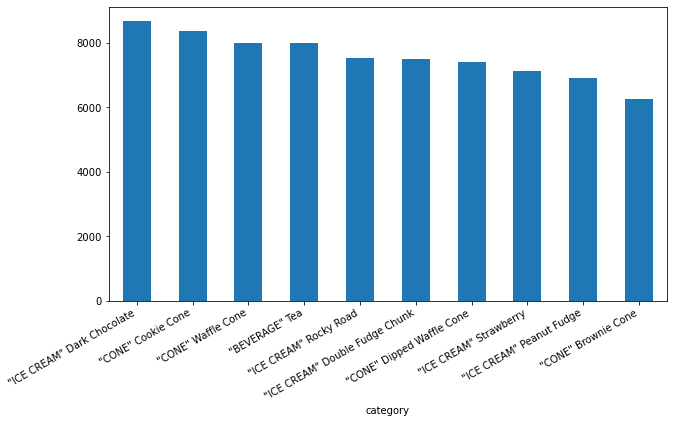

In [225]:
f, ax = plt.subplots(figsize=(10, 6))
df.groupby('category')['line_total'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
f.autofmt_xdate()
plt.show()